# Simplest Generative Model (Independent Features)

What's the simplest kind of generative model? When dealing with high-dimensional objects, probably the simplest one can do is to have a separate generative process for each independent dimension or, in the case of images, each pixels. For simplicity, we will also assume binarize each pixel so that it is either "white" or "black". 

That means we can represent each pixel with a random variable that takes one of two values, and simply adjust the probability that the pixel takes on "white." This is the definition of a the *Bernoulli random variable*, with a success probability $p$. How do we choose an appropriate value of $p_i$ for each pixel $i$ in the image?

We can use *maximum likelihood estimation*, a well-defined procedure from statistics to estimate an unknown parameter from observations of the random variable. In the case of a Bernoulli random variable, the procedure is especially simple: we simply compute the proportion of images in which that particular pixel is white, and this becomes our success probability. We will let

$$ p_i = \frac{\text{# of images in which pixel $i$ is white}}{\text{total # of images}}$$

Let's see how this does with a few different image datasets.

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scripts import celeba_utils
import os
import glob

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading MNIST Handwritten Digits

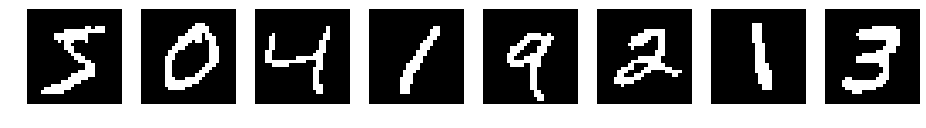

In [6]:
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = np.rint(x_train.astype(float)/255)  # Binarize the images.
n_show = 8

# Show some examples.
_, ax = plt.subplots(1, 8, figsize=[16, 2])
for i in range(n_show):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_axis_off()

## Train a Generative Model with Independent Features

Text(0.5, 1.0, 'Heatmap of Bernoulli probabilities')

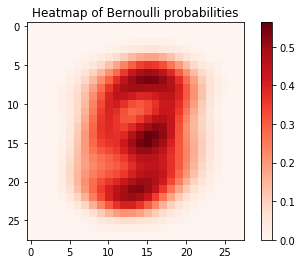

In [15]:
bernoulli_probabilities = np.sum(x_train, axis=0)/x_train.shape[0]
plt.imshow(bernoulli_probabilities, cmap='Reds')
plt.colorbar()
plt.title('Heatmap of Bernoulli probabilities')

## Sample from Generative Model

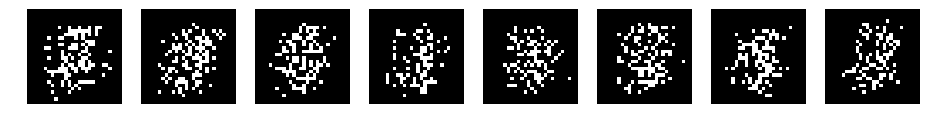

In [21]:
_, ax = plt.subplots(1, 8, figsize=[16, 2])
for i in range(n_show):
    img = np.random.random((x_train[0].shape)) < bernoulli_probabilities
    ax[i].imshow(img, cmap='gray')
    ax[i].set_axis_off()

It's clear that these images look nothing like digits! Why not? Because although the pixels are on in roughly the right area, they don't form any sort of coherent pattern. They're all acting independently, on their own, rather than syncronizing themselves based on what their neighbors are doing.

## With Single Classes of Digits

Maybe things are a little better than the generative model is trained on individual classes of digits?

### The Digit `0`

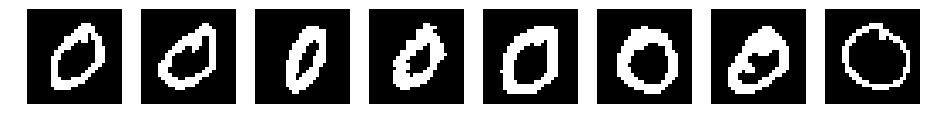

In [22]:
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
idx = np.where(y_train<1); x_train = x_train[idx]; y_train=y_train[idx]  # Get only digit 0
x_train = np.rint(x_train.astype(float)/255)  # Binarize the images.
n_show = 8

# Show some examples.
_, ax = plt.subplots(1, 8, figsize=[16, 2])
for i in range(n_show):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_axis_off()

Text(0.5, 1.0, 'Heatmap of Bernoulli probabilities')

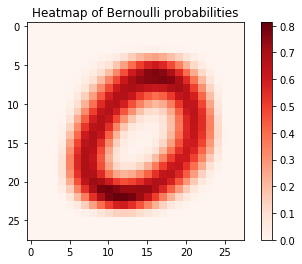

In [23]:
bernoulli_probabilities = np.sum(x_train, axis=0)/x_train.shape[0]
plt.imshow(bernoulli_probabilities, cmap='Reds')
plt.colorbar()
plt.title('Heatmap of Bernoulli probabilities')

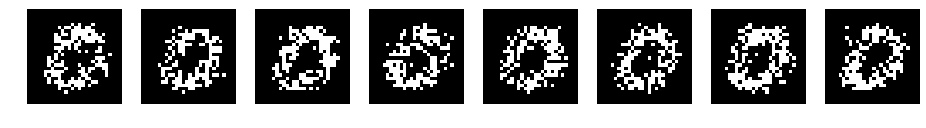

In [24]:
_, ax = plt.subplots(1, 8, figsize=[16, 2])
for i in range(n_show):
    img = np.random.random((x_train[0].shape)) < bernoulli_probabilities
    ax[i].imshow(img, cmap='gray')
    ax[i].set_axis_off()

So at least the images are recognizable as zeros, but even here, notice that there are occasional gaps and holes in weird pixels, because these pixels haven't consulted their neighbors and realized they should be "white".

## MNIST Fashion Dataset

For a little variety, let's try the same thing, but on the MNIST-Fashion dataset, again with a single class (*ankle boots*):

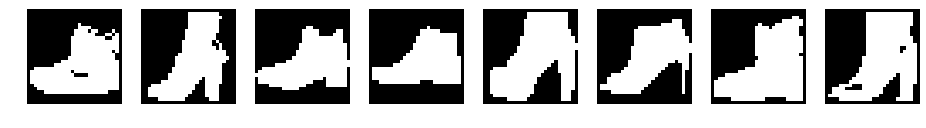

In [27]:
(x_train, y_train), _ = tf.keras.datasets.fashion_mnist.load_data()
idx = np.where(y_train>8); x_train = x_train[idx]; y_train=y_train[idx]  # Get only digit 0
x_train = np.rint(x_train.astype(float)/255)  # Binarize the images.
n_show = 8

# Show some examples.
_, ax = plt.subplots(1, 8, figsize=[16, 2])
for i in range(n_show):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_axis_off()

Text(0.5, 1.0, 'Heatmap of Bernoulli probabilities')

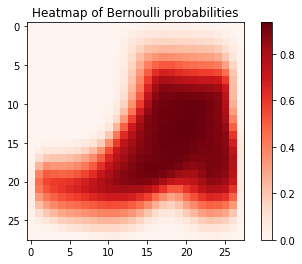

In [28]:
bernoulli_probabilities = np.sum(x_train, axis=0)/x_train.shape[0]
plt.imshow(bernoulli_probabilities, cmap='Reds')
plt.colorbar()
plt.title('Heatmap of Bernoulli probabilities')

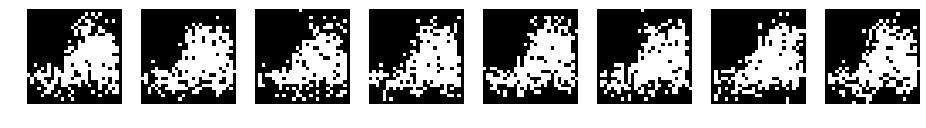

In [29]:
_, ax = plt.subplots(1, 8, figsize=[16, 2])
for i in range(n_show):
    img = np.random.random((x_train[0].shape)) < bernoulli_probabilities
    ax[i].imshow(img, cmap='gray')
    ax[i].set_axis_off()

## Loading the CelebA Dataset

In [61]:
data_dir = 'datasets/celeba_data'
celeba_utils.download_extract('celeba', data_dir)
paths = glob.glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))
x_train = celeba_utils.get_batch(paths[:1000], 256, 256, 'RGB')

Found celeba Data


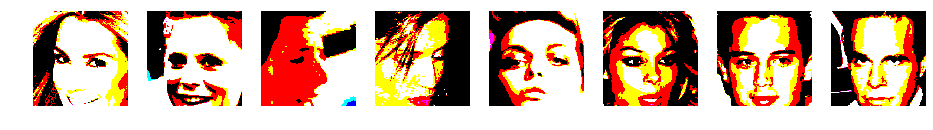

In [62]:
x_train = np.rint(x_train.astype(float)/255)  # Binarize each channel in the images.
n_show = 8

# Show some examples.
_, ax = plt.subplots(1, 8, figsize=[16, 2])
for i in range(n_show):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_axis_off()

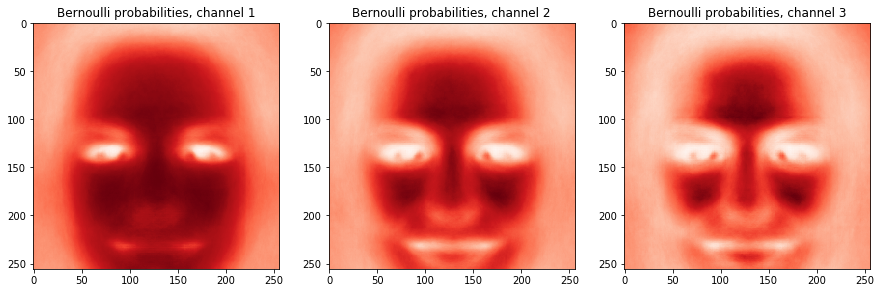

In [68]:
bernoulli_probabilities = np.sum(x_train, axis=0)/x_train.shape[0]
_, ax = plt.subplots(1, 3, figsize=[15, 5])
for i in range(3):
    ax[i].imshow(bernoulli_probabilities[:,:,i], cmap='Reds')
    ax[i].set_title('Bernoulli probabilities, channel {}'.format(i+1))

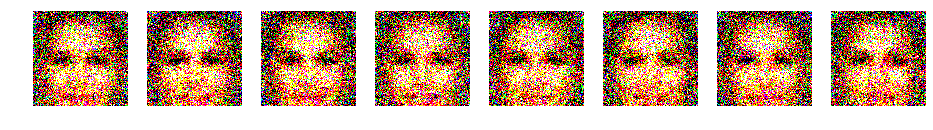

In [69]:
_, ax = plt.subplots(1, 8, figsize=[16, 2])
for i in range(n_show):
    img = np.random.random((x_train[0].shape)) < bernoulli_probabilities
    ax[i].imshow(img.astype('float64'), cmap='gray')
    ax[i].set_axis_off()

So in conclusion, it seems that our simple idea of training generative models is not going to work for sampling. We're going to have to somehow encode dependencies into our generative model. Does this mean that our model is completely useless? Not necessarily, we could use it for other things than sample -- for example, anomaly detection, as we show in the extension to this notebook!